Скачаем данные

In [1]:
!wget https://storage.geekclass.ru/images/57eecb91-cd8e-4904-b2cb-e1ddc052de4a.csv -O flights.csv

--2020-03-06 17:32:33--  https://storage.geekclass.ru/images/57eecb91-cd8e-4904-b2cb-e1ddc052de4a.csv
Resolving storage.geekclass.ru (storage.geekclass.ru)... 185.247.118.6
Connecting to storage.geekclass.ru (storage.geekclass.ru)|185.247.118.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9719482 (9,3M) [text/csv]
Saving to: ‘flights.csv’

flights.csv         100%[===================>]   9,27M  99,1KB/s    in 83s     

2020-03-06 17:33:57 (114 KB/s) - ‘flights.csv’ saved [9719482/9719482]



In [2]:
import pandas as pd

Загрузите данные из файла ```flights.csv```

In [6]:
data = pd.read_csv('flights.csv')

Наша целевая переменная для классификации: ```Cancelled```, а для регрессии -- ```AirTime``` Сохраним их отдельно и удалим из основных данных

In [7]:
y = data.Cancelled
y_regression = data.AirTime.fillna(0)

data = data.drop(['AirTime','Cancelled'], axis=1)

In [8]:
leaky_features = ["CancellationCode", "Year", "Diverted", "ArrTime", "ActualElapsedTime",
                  "ActualElapsedTime", "ArrDelay", "TaxiIn","TaxiOut", "CarrierDelay",
                  'TailNum', "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay",'DepTime', 'DepDelay']

In [11]:
data.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,CRSElapsedTime,Origin,Dest,Distance
0,1,3,4,1955,2225,WN,335,150,IAD,TPA,810
1,1,3,4,735,1000,WN,3231,145,IAD,TPA,810
2,1,3,4,620,750,WN,448,90,IND,BWI,515
3,1,3,4,930,1100,WN,1746,90,IND,BWI,515
4,1,3,4,1755,1925,WN,3920,90,IND,BWI,515


```leaky_features``` -- это фичи, которые мы знаем только если знаем целевую. Если модель обучится на них, она не сможет давать предсказания для новых данных.

Удалите эти фичи из данных

In [10]:
data = data.drop(columns=leaky_features)

Посмотрите на гистограммы признаков. Можно ли какие-то удалить? Почему? 

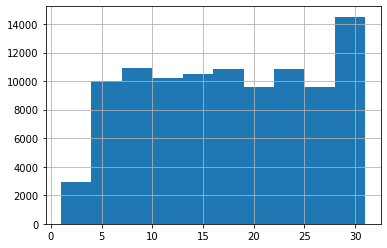

In [18]:
data['DayofMonth'].hist()

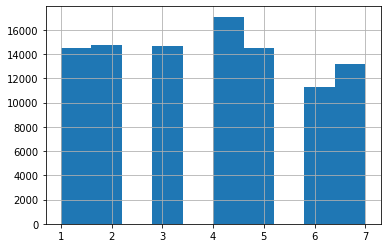

In [19]:
data['DayOfWeek'].hist()

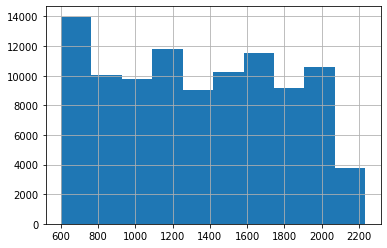

In [20]:
data['CRSDepTime'].hist()

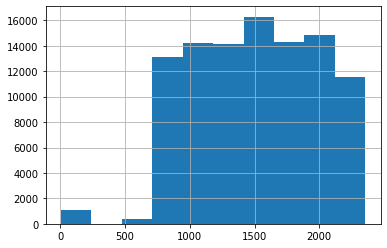

In [21]:
data['CRSArrTime'].hist()

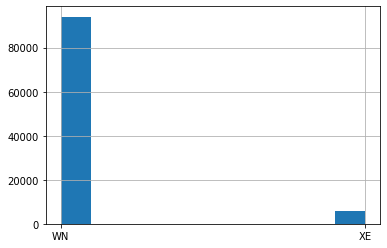

In [22]:
data['UniqueCarrier'].hist()

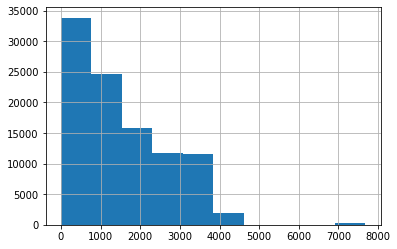

In [23]:
data['FlightNum'].hist()

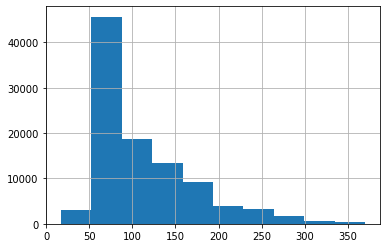

In [24]:
data['CRSElapsedTime'].hist()

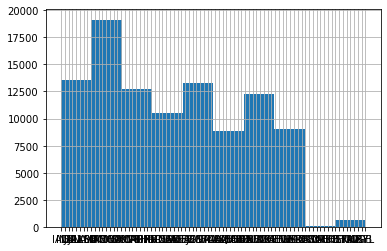

In [25]:
data['Origin'].hist()

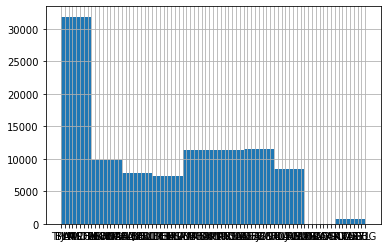

In [26]:
data['Dest'].hist()

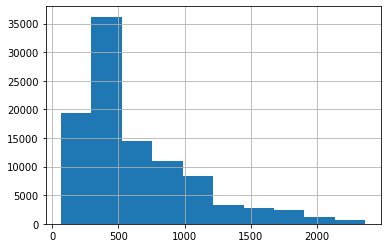

In [27]:
data['Distance'].hist()

Удалите бесполезные признаки, выбранные вами на предыдущем шаге

In [ ]:
data = <...>

Переведите все категориальные признаки в числовые. 
Значения признанов, встречающиеся менее 50 раз замените на значение ```Rare```.

Если значение ```Rare``` встречается меньше 50 раз, не надо добавлять его как отдельную колонку.

(если это задание не получается, просто удалите категориальные признаки, но это будет стоить вам баллов)

Подсказка: можете использовать pd.get_dummies (Можно использовать tab и shift+tab для того, чтобы открыть документацию)

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object': # Выбираем категориальные признаки
        <...>

Заполните отсутствующие значения на своё усмторение

In [ ]:
data = <...>

In [ ]:
import numpy as np

Отшкалируйте (стандартизируйте) данные

In [ ]:
X = data.values.astype('float32')
X = <...>

In [ ]:
assert np.isfinite(X).all()

Разделим данные на обучающие/тестовые (НЕ ТРОГАЙТЕ ЭТУ КЛЕТКУ!)

In [ ]:
np.random.seed(42)
test_inds = np.arange(X.shape[0])
np.random.shuffle(test_inds)

test_inds = test_inds[:1000]

is_test = np.zeros(X.shape[0], dtype='bool')
is_test[test_inds] = True

X_train = X[~is_test]
X_test = X[is_test]
y_train = y[~is_test]
y_test = y[is_test]
y_regression_train = y_regression[~is_test]
y_regression_test = y_regression[is_test]


Обучите несколько моделей, предсказыаающих ```y```

In [ ]:
from sklearn import <...>

In [ ]:
<...>

Какие метрики измерения качества классификации вы знаете? Что можно сказать об их применимости к данной задаче?

```ВАШ ОТВЕТ```

Постройте ROC кривые для обученных моделей. Вычислите roc_auc для этих моделей.

Подсказка: можете использовать sklearn.metrics

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
<...>

Продолжайте обучать модели пока не получите roc_auc хотя бы 0.8 на тестовых данных

Постройте график Precision-recall для всех моделей.

Выберете модель и порог, при которых самый большой precision при recall не меньше 0.05

In [ ]:
<...>

Посмотрите на важности признаков по мнениям моделей. Что можно сказать? В каких аэропортах больше всего отменяют рейсы? А в каких меньше?

In [ ]:
<...>

Обучите модели для регрессии ```y_regression``` (Почти для каждой модели классификации есть аналогичная модель регрессии)

In [ ]:
from sklearn import <...>

In [ ]:
<...>

Посчитайте MSE для каждой модели. Какая работает лучше всего?

In [ ]:
<...>

Получите MSE как минимум 200